### Configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parse as p

# Extremely important
sns.set(style="whitegrid", font_scale=1.35, rc={'figure.figsize':(11.7,5.27)}) #Change Font Size 

Please change this number for visual analysis

In [2]:
NUM_OF_NODE = 10
NUM_OF_INSTANCES = 2

### Parse files

In [3]:
TOTAL_NODES = NUM_OF_NODE * NUM_OF_INSTANCES

# Load Files
bwFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "bandwidth")
delayFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "delay")


# Save into data structure
Bandwidths = [[] for _ in range(TOTAL_NODES)]
TX_ID, TX_Counter = dict(), dict()


# Parse bandwidth.txt
for i in range(TOTAL_NODES):
    for entry in p.parseColumn(bwFileList[i], 0):
        Bandwidths[i].append(int(entry))

# Parse delay.txt
for i in range(TOTAL_NODES):
    for line in delayFileList[i]:
        l = line.split()
        tx_id, time = str(l[0]), l[1]
        if tx_id not in TX_ID.keys():
             TX_ID.update({tx_id: [float(time)]})
        else:
            TX_ID[tx_id].append(float(time))
            length = len(TX_ID[tx_id])
            TX_Counter.update({tx_id:length})            

Delays = [[] for _ in range(len(TX_ID))]
for (i, (k, v)) in enumerate(TX_ID.items()):
    minimum =  float(np.min(v))
    for entry in v:
        Delays[i].append(entry - minimum)
        
Reaches = [[] for _ in range(len(TX_ID))]
for (i, (k, v)) in enumerate(TX_Counter.items()):
    Reaches[i].append(int(v))
        
# print(TX_ID)
# print(TX_Counter)

Load Complete
Load Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete


### Bandwidth

In [4]:
b = pd.DataFrame(Bandwidths)
b = b.fillna(value="0")
b

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0,0,212,393,1417,1582,1362,1244,3100,3174,...,1632,2193,707,1401,421,300,3388,0,0,0
1,0,0,93,252,798,507,1384,446,2330,3452,...,0,0,0,0,0,0,0,0,0,0
2,0,0,145,1037,1450,2062,2877,2036,3337,5926,...,0,0,0,0,0,0,0,0,0,0
3,0,0,113,372,821,728,727,1573,1580,2229,...,0,0,0,0,0,0,0,0,0,0
4,0,0,614,1373,2365,2833,2395,2809,4934,6101,...,0,0,0,0,0,0,0,0,0,0
5,0,0,189,323,1833,1094,1517,1584,3110,5799,...,0,0,0,0,0,0,0,0,0,0
6,0,0,325,767,2605,2885,2968,1590,3820,8272,...,0,0,0,0,0,0,0,0,0,0
7,0,0,105,588,1685,1278,1939,838,3453,3666,...,0,0,0,0,0,0,0,0,0,0
8,0,0,202,464,1050,1512,1648,819,3074,6419,...,0,0,0,0,0,0,0,0,0,0
9,0,0,105,407,1078,281,1907,719,2210,4423,...,3287,212,1851,1968,1279,1348,6122,0,0,0


### Delays

In [5]:
d = pd.DataFrame(Delays)
d.T

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.401679,0.514068,0.250619,0.000000,0.408489,0.730042,0.366024,0.744137,0.772127,0.535128,...,18.327573,17.556532,0.000000,13.378106,0.0,0.0,0.000000,5.829188,0.0,0.0
1,1.185448,0.636071,0.382810,0.783214,0.706576,1.404816,1.062362,0.281168,0.508470,1.085124,...,23.725421,22.954377,5.050235,11.293914,NaN,NaN,8.921413,0.000000,NaN,NaN
2,0.000000,0.248998,0.175482,0.193014,0.490541,0.243142,0.329520,0.705376,0.733377,0.496511,...,16.098980,15.327967,NaN,8.754811,NaN,NaN,2.814476,4.049957,NaN,NaN
3,0.712514,0.260126,0.430587,0.643961,0.655512,0.000000,0.649197,0.419296,0.855045,0.925920,...,7.562399,6.791372,NaN,12.242397,NaN,NaN,NaN,4.582607,NaN,NaN
4,0.554706,0.140476,0.000000,0.110644,0.319419,0.686312,0.289173,0.246504,0.208816,0.447503,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,0.775768,0.547409,0.246198,0.704974,0.649842,0.320880,0.862775,0.279702,0.131866,0.357419,...,8.698373,7.927344,NaN,8.476136,NaN,NaN,NaN,NaN,NaN,NaN
6,0.659906,0.288566,0.403387,0.089999,0.000000,0.798503,0.322991,0.313726,0.453118,0.216125,...,2.844895,2.073870,NaN,2.684211,NaN,NaN,NaN,NaN,NaN,NaN
7,0.958434,0.686693,0.425243,0.277565,0.685086,0.898091,0.378331,0.801121,0.829113,0.592118,...,12.363908,11.592877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.679742,0.471390,0.551976,0.819307,0.478701,1.598249,1.078704,0.408560,0.898305,0.881327,...,4.108057,3.337030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.960099,0.614315,0.408880,0.775393,0.808940,1.344208,0.824619,0.485342,0.248295,0.738546,...,4.572925,3.801895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reachability

In [6]:
r = pd.DataFrame(Reaches)
r.T

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,8.0,8.0,8.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN


### Plot

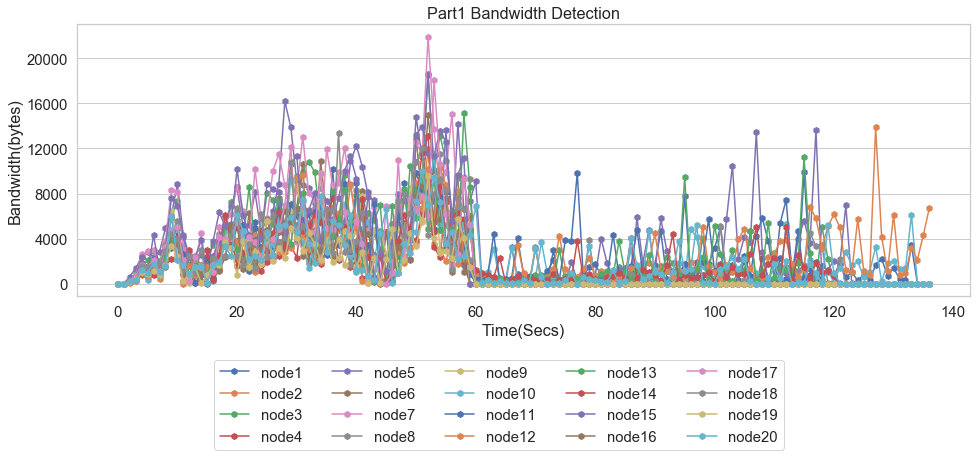

In [7]:
# Setting
TIME = b.shape[1]
# numTransactions = range(0, len(b.T[0])) # Delay
timeRange = range(0, TIME) # Bandwidth


plt.subplots(figsize=(16, 5)) 
plt.subplots_adjust(hspace=.45)

# Banwidth
ax1 = plt.subplot(111)
for i in range(0, TOTAL_NODES):
    plt.plot(timeRange, b.T[i], marker='h')
ax1.legend(['node' + str(i) for i in range(1, TOTAL_NODES +1)], loc='right', bbox_to_anchor=(0.8, -0.4), ncol = 5)
ax1.set(xlabel='Time(Secs)', ylabel='Bandwidth(bytes)', title='Part1 Bandwidth Detection', label="max")
plt.yticks(np.arange(0, 24000, step=4000))
plt.grid(b=None, which='major', axis='x')

# Save as file
plt.savefig('img/Part1_Bandwidth_Plot.png')

### Propagation Delay

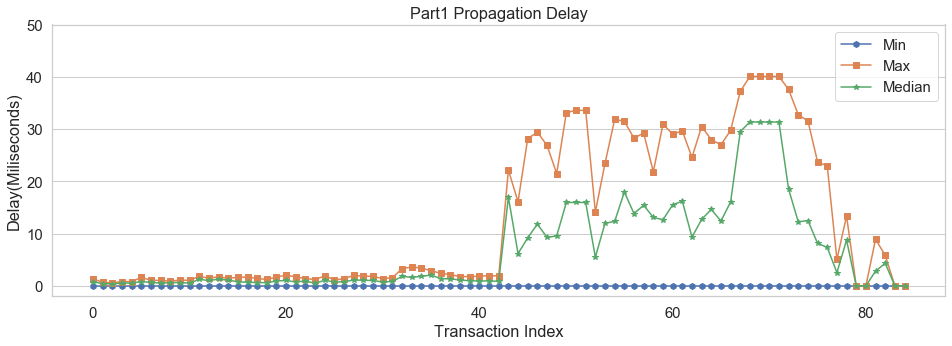

In [8]:
# Setting
txNum = len(TX_ID)
txRange = range(0, txNum) # Number of transactions
d_minVal, d_maxVal, d_median = d.T.min(), d.T.max(), d.T.median()

# Delay
fig, ax2 = plt.subplots(figsize=(16, 5))
# plt.subplots(figsize=(16, 5)) 
# plt.subplots_adjust(hspace=10)

plt.plot(txRange, d_minVal, marker='h')
plt.plot(txRange, d_maxVal, marker='s')
plt.plot(txRange, d_median, marker='*')
ax2.legend(['Min', 'Max', 'Median'])

# for i in range(0, txNum):
#     plt.plot(txRange, d[i], marker='h')
ax2.set(xlabel='Transaction Index', ylabel='Delay(Miliseconds)', title='Part1 Propagation Delay', label="max")
plt.yticks(np.arange(0, 60, step=10))
plt.grid(b=None, which='major', axis='x')

# Save as file
plt.savefig('img/Part1_Delay_Plot.png')

In [9]:
print(txNum)
print(txRange)

85
range(0, 85)


### Number of nodes the transaction reached

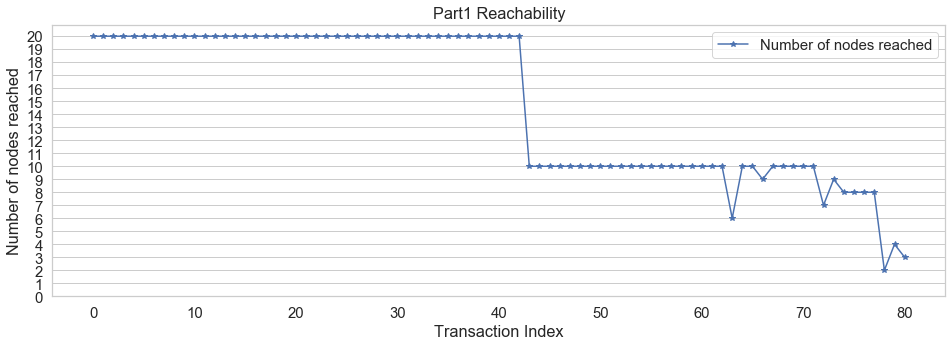

In [10]:
# Setting
txNum = len(TX_ID)
txRange = range(0, txNum) # Number of transactions

# Number
fig, ax3 = plt.subplots(figsize=(16, 5))


plt.plot(txRange, r, marker='*')
ax3.legend(['Number of nodes reached'])

ax3.set(xlabel='Transaction Index', ylabel='Number of nodes reached', title='Part1 Reachability', label="max")
plt.yticks(np.arange(0, TOTAL_NODES+1, step=1))
plt.grid(b=None, which='major', axis='x')

# Save as file
plt.savefig('img/Part1_Reachability_Plot.png')